#Takehome Quiz 2  

In [3]:
#Question 2 a)
#Importing all the  modules that I will use for this code
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
#I had saved the data as a csv file using excel
#Here I read the data, giving it the name 'data'
data = pd.read_csv('THQ2data.csv')
data

,Q,L,K
0,80,60,50
1,150,100,100
2,135,100,80
3,165,120,100
4,95,70,60
5,130,90,80
6,110,80,70


In [16]:
#Calculating the means, variances, standard deviations and medians for each of Q,L and K
data.mean()

Q    123.571429
L     88.571429
K     77.142857
dtype: float64

In [17]:
data.var()

Q    914.285714
L    414.285714
K    357.142857
dtype: float64

In [18]:
data.std()

Q    30.237158
L    20.354010
K    18.898224
dtype: float64

In [19]:
data.median()

Q    130.0
L     90.0
K     80.0
dtype: float64

Text(0.5, 1.0, 'Histogram of Output(Q)')

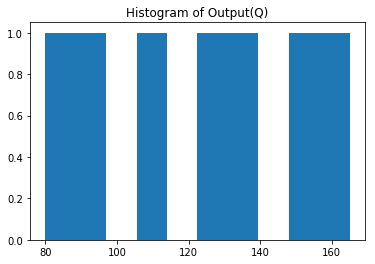

In [27]:
#Question 2 b)
#Plotting the Histogram of Q
Qdata = data['Q']
plt.hist(Qdata)
plt.title("Histogram of Output(Q)")

Text(0.5, 1.0, 'Histogram of Labour(L)')

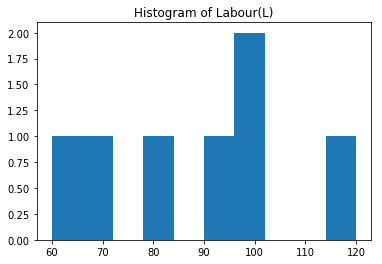

In [28]:
#Plotting the histogram of L
Ldata = data['L']
plt.hist(Ldata)
plt.title("Histogram of Labour(L)")

In [29]:
#Question 2 c)
#Doing a log transform of the data and showing the new values
ndata = pd.DataFrame(data)
logdata = ndata.transform(np.log)
logdata

,Q,L,K
0,4.382027,4.094345,3.912023
1,5.010635,4.605170,4.605170
2,4.905275,4.605170,4.382027
3,5.105945,4.787492,4.605170
4,4.553877,4.248495,4.094345
5,4.867534,4.499810,4.382027
6,4.700480,4.382027,4.248495


In [31]:
x = logdata[['L', 'K']]
y = logdata['Q']
#Showing Y
y

0    4.382027
1    5.010635
2    4.905275
3    5.105945
4    4.553877
5    4.867534
6    4.700480
Name: Q, dtype: float64

In [32]:
#Showing x
x

,L,K
0,4.094345,3.912023
1,4.605170,4.605170
2,4.605170,4.382027
3,4.787492,4.605170
4,4.248495,4.094345
5,4.499810,4.382027
6,4.382027,4.248495


In [34]:
#Question 2 d)
#Multiple regression on the data:
regr = linear_model.LinearRegression()
model = regr.fit(x, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.14623321175616955
Coefficients: 
 [0.54842747 0.50874094]


In [43]:
from statsmodels.formula.api import ols
x2 = sm.add_constant(x)
estimat = sm.OLS(y, x2)
estimat2 = estimat.fit()
print (estimat2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        23:02:47   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1462      0.114      1.282      0.2

C:\Users\chipo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\chipo\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [56]:
#Residuals
import seaborn as sns


ValueError: shapes (7,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

In [58]:
#Question 2 f)
print(estimat2.summary())
#R^2 = 0.998

                            OLS Regression Results                            
Dep. Variable:                      Q   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     958.4
Date:                Thu, 16 May 2019   Prob (F-statistic):           4.34e-06
Time:                        23:16:52   Log-Likelihood:                 21.712
No. Observations:                   7   AIC:                            -37.42
Df Residuals:                       4   BIC:                            -37.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1462      0.114      1.282      0.2

C:\Users\chipo\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)
